In [1]:
%load_ext autoreload
%autoreload 2
# Gestionar las rutas
import utils.paths as path

In [3]:
# Acceso al directorio de los datasets
data_dir = path.make_dir_function('data')
raw_data_dir = data_dir('raw')
csv_files = raw_data_dir.glob('*.csv')

In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
csv_files_dict = {}
for csv_file in csv_files:
    csv_files_dict[f"{csv_file.name.lower().split('.')[0]}"] = csv_file

In [5]:
# df_admissions = pd.read_csv('../data/raw/ADMISSIONS.csv')
# df_services = pd.read_csv('../data/raw/SERVICES.csv')
# df_d_items = pd.read_csv('../data/raw/D_ITEMS.csv')
# df_datetimeevents = pd.read_csv('../data/raw/DATETIMEEVENTS.csv')
# df_drgcodes = pd.read_csv('../data/raw/DRGCODES.csv')
# df_outputevents = pd.read_csv('../data/raw/OUTPUTEVENTS.csv')
# df_procedures_icd = pd.read_csv('../data/raw/PROCEDURES_ICD.csv')
# df_services = pd.read_csv('../data/raw/SERVICES.csv')

In [13]:
df_admissions = pd.read_csv(csv_files_dict['admissions'])
df_patients = pd.read_csv(csv_files_dict['patients'])

In [97]:
# Cantidad de registros y columnas del dataset
print(f'Cantidad de registros: {df_admissions.shape[0]}\nCantidad de columnas: {df_admissions.shape[1]}')

Cantidad de registros: 129
Cantidad de columnas: 19


In [93]:
# Información del dataset admisiones
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

Descripcion de las columnas o variables del dataset ``admissions``:
- **'row_id'**: 
- **'subject_id'**: 
- **'hadm_id'**: 
- **'admittime'**: 
- **'dischtime'**: Fecha y hora de alta del paciente.
- **'deathtime'**: Fecha y hora de la muerte del paciente.
- **'admission_type'**: Tipo de admision que puede ser del tipo Emergencia (atención médica inmediata debido), Electiva (intervención médica programada, no hay necesidad de que el paciente sea hospitalizado inmediatamente) o Urgente (atención médica inmediata, pero su afección no es una emergencia médica).
- **'admission_location'**: Lugar donde el paciente fue ingresado en el hospital, como 'Emergency Room Admit', 'Transfer From Hosp/Extram', 'Phys Referral/Normal Deli','Clinic Referral/Premature', 'Transfer From Skilled Nur'.
- **'discharge_location'**: Lugar del paciente donde fue dado de alta: 'Home Health Care', 'Dead/Expired', 'Snf', 'Rehab/Distinct Part Hosp', 'Home', 'Hospice-Home', 'Disch-Tran To Psych Hosp', 'Home With Home Iv Providr', 'Long Term Care Hospital', 'Icf'.
- **'insurance'**: Tipo de seguro del paciente, que puede ser 'Medicare', 'Private', 'Medicaid', 'Government'
- **'language'**: Idioma de habla del paciente: 'POLI', 'ENGL', 'MAND', 'RUSS', 'SPAN'. Hay valores nulos.
- **'religion'**: Grupo de religioso al cual pertence el paciente: 'Catholic', 'Other', 'Protestant Quaker', 'Not Specified', 'Jewish', 'Unobtainable', 'Christian Scientist', 'Buddhist', 'Romanian East. Orth', 'Muslim'. Hay valores nulos.
- **'marital_status'**: Estado civil del paciente, que puede ser 'Separated', 'Single', 'Divorced', 'Married', 'Widowed', 'Unknown (Default)'. Hay valores nulos.
- **'ethnicity'**: Origen étnico del paciente: 'Black/African American', 'Unknown/Not Specified', 'White', 'Other', 'Asian', 'Hispanic Or Latino', 'Hispanic/Latino - Puerto Rican', 'Unable To Obtain', 'American Indian/Alaska Native Federally Recognized Tribe'.
- **'edregtime'**: Fecha y hora en que el paciente fue registrado en el departamento de emergencias, lo que indica el momento en que ingresó al hospital. Hay valores nulos porque no todos los pacientes reciben atención del tipo emergencias.
- **'edouttime'**:  fecha y hora en que el paciente fue dado de alta o trasladado desde el departamento de emergencias a otra unidad del hospital o a otro centro médico. Hay valore nulos.
- **'diagnosis'**: Diagnóstico principal del ingreso hospitalario del paciente como Hepatites B, Sepsis, Humeral Fracture, etc.
- **'hospital_expire_flag'**: Indica si un paciente murió durante su estadía en el hospital. Si el valor es 1, significa que el paciente falleció durante su hospitalización; si el valor es 0, significa que el paciente sobrevivió y fue dado de alta o transferido a otro lugar.
- **'has_chartevents_data'**: Variable binaria que indica si hay datos de registros médicos en el registro del paciente. Si el valor es 1, significa que hay datos de registros médicos disponibles para el paciente; si el valor es 0, significa que no hay datos de registros médicos para el paciente.

In [17]:
df_admissions

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,41055,44083,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,ENGL,CATHOLIC,SINGLE,WHITE,2112-05-28 13:16:00,2112-05-28 17:30:00,PERICARDIAL EFFUSION,0,1
125,41070,44154,174245,2178-05-14 20:29:00,2178-05-15 09:45:00,2178-05-15 09:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,2178-05-14 17:37:00,2178-05-14 22:08:00,ALTERED MENTAL STATUS,1,1
126,41087,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
127,41090,44222,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2180-07-19 04:50:00,2180-07-19 08:23:00,BRADYCARDIA,0,1


In [14]:
df_patients

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1
...,...,...,...,...,...,...,...,...
95,31838,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,1
96,31853,44154,M,1878-05-14 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,1
97,31867,44212,F,2078-06-16 00:00:00,2124-01-29 00:00:00,NaN,2124-01-29 00:00:00,1
98,31870,44222,M,2107-06-27 00:00:00,2182-08-03 00:00:00,2182-08-03 00:00:00,NaN,1


In [16]:
df_patients[['subject_id', 'gender', '']]

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1
...,...,...,...,...,...,...,...,...
95,31838,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,1
96,31853,44154,M,1878-05-14 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,1
97,31867,44212,F,2078-06-16 00:00:00,2124-01-29 00:00:00,NaN,2124-01-29 00:00:00,1
98,31870,44222,M,2107-06-27 00:00:00,2182-08-03 00:00:00,2182-08-03 00:00:00,NaN,1


In [94]:
# Columnas del dataframe
df_admissions.columns

Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'religion',
       'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
       'hospital_expire_flag', 'has_chartevents_data'],
      dtype='object')

In [95]:
# Normalizacion de columnas
dict_cols = {
    'admittime':'adtmit_time',
    'dischtime':'disch_time',
    'deathtime': 'death_time',
    'has_chartevents_data': 'has_chart_events_data'
}
df_admissions = df_admissions.rename(dict_cols, axis=1)

In [96]:
# Informacion del dataset
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   row_id                 129 non-null    int64 
 1   subject_id             129 non-null    int64 
 2   hadm_id                129 non-null    int64 
 3   adtmit_time            129 non-null    object
 4   disch_time             129 non-null    object
 5   death_time             40 non-null     object
 6   admission_type         129 non-null    object
 7   admission_location     129 non-null    object
 8   discharge_location     129 non-null    object
 9   insurance              129 non-null    object
 10  language               81 non-null     object
 11  religion               128 non-null    object
 12  marital_status         113 non-null    object
 13  ethnicity              129 non-null    object
 14  edregtime              92 non-null     object
 15  edouttime              

In [82]:
# Registros duplicados
df_admissions.duplicated().sum()

0

In [83]:
# Datos duplicados por columna
for col in df_admissions.columns:
    print(f'{col}: {df_admissions.duplicated(col).sum()}')

row_id: 0
subject_id: 29
hadm_id: 0
admittime: 0
dischtime: 0
deathtime: 88
admission_type: 126
admission_location: 124
discharge_location: 119
insurance: 125
language: 123
religion: 118
marital_status: 122
ethnicity: 120
edregtime: 36
edouttime: 36
diagnosis: 34
hospital_expire_flag: 127
has_chartevents_data: 127


In [64]:
df_admissions.iloc[:, 0]

0      12258
1      12263
2      12265
3      12269
4      12270
       ...  
124    41055
125    41070
126    41087
127    41090
128    41092
Name: row_id, Length: 129, dtype: int64

In [117]:
def plot_correlation_matrix(dataframe):
    dataframe = dataframe.select_dtypes(int)
    corr = dataframe.corr()  # obtener la matriz de correlación
    mask = np.triu(np.ones_like(corr, dtype=bool))  # crear una máscara triangular superior
    cmap = sns.diverging_palette(230, 20, as_cmap=True)  # seleccionar un esquema de color divergente
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.3f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Matriz de correlación')
    plt.show()

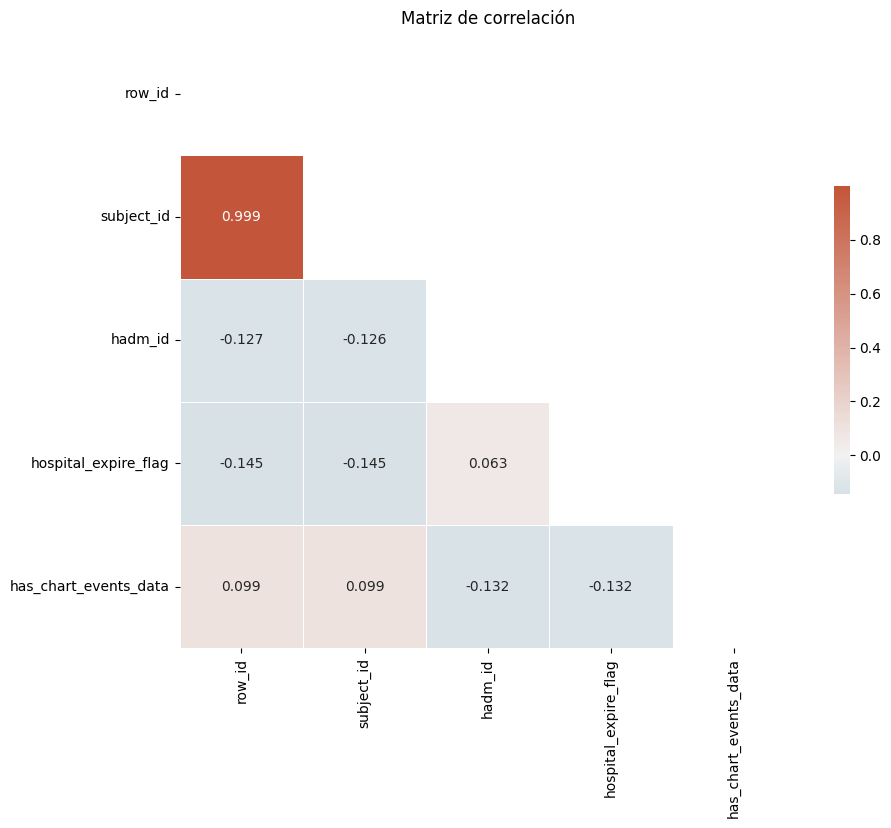

In [118]:
plot_correlation_matrix(df_admissions)

* No podemos notar correlacion alta entre las variables numéricas, execpto entre ``rwo_id`` y ``subject_id``.